In [49]:
import tensorflow as tf
import datasets
import experiments
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt

In [50]:
output_path = '/om/user/xboix/share/insideness/'
run_opt = experiments.get_experiments(output_path)[1:]

In [51]:
results_data = []
for opt in run_opt:
    data_point = {}
    data_point["C"] = opt.hyper.complex_crossing
    data_point["alpha"] =  opt.hyper.alpha
    data_point["init_factor"] = opt.hyper.init_factor
    data_point["learning_rate"] = opt.hyper.learning_rate
    data_point["batch_size"] = opt.hyper.batch_size
    
    data_point["dataset_complexity"] = opt.dataset.complexity
    data_point["dataset_strict_complexity"] = opt.dataset.complexity_strict
    
    if not os.path.isfile(opt.log_dir_base + opt.name + '/results/intra_dataset_accuracy.pkl'):
        data_point["results"] = "empty"
       
    else:
        with open(opt.log_dir_base + opt.name + '/results/intra_dataset_accuracy.pkl', 'rb') as f:
            data_point["results"] = pickle.load(f)
            
    results_data.append(copy.deepcopy(data_point))

In [52]:
max_val_acc = -np.ones([2, 5])
max_idx = np.zeros([2, 5])
missing = np.zeros([2, 5])

for point_idx, data_point in enumerate(results_data):

    point_complextity = data_point["dataset_complexity"]
    idx_strict = 1-int(data_point["dataset_strict_complexity"])
    
    #if (not ("val" in data_point["results"])):
    #    print(point_idx)
    
    if not (data_point["results"] == "empty") and ("val" in data_point["results"]): 
        
            if max_val_acc[idx_strict, point_complextity] < data_point["results"]["val"]:
                max_idx[idx_strict, point_complextity] = point_idx
                max_val_acc[idx_strict, point_complextity] = data_point["results"]["val"]
    
    else:
        missing[idx_strict, point_complextity] += 1

max_train = np.zeros([2, 5])
max_test = np.zeros([2, 5])
max_train_loose = np.zeros([2, 5])
max_test_loose = np.zeros([2, 5])

C = np.zeros([2, 5])
alpha =  np.zeros([2, 5])
init_factor = np.zeros([2, 5])
learning_rate = np.zeros([2, 5])
batch_size = np.zeros([2, 5])
for idx_strict, dataset_strict_complexity  in enumerate([True, False]):
    for dataset_complexity in range(5):
        max_train[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["train"]
        max_test[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["test"]
        max_train_loose[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["trainloose"]
        max_test_loose[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["testloose"]
        
        C[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["C"]
        alpha[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["alpha"]
        init_factor[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["init_factor"]
        learning_rate[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["learning_rate"]
        batch_size[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["batch_size"]
        

[93.32477265 84.02134557  0.41259683  3.21972886  0.09367632]
[93.48265409 83.46665544  0.50206298  3.04921691  0.1494611 ]
[99.76317784 94.9155746  97.31391041 89.66297575 51.42724823]
[99.69160492 95.13503864 97.34653924 89.62297912 50.55469013]
[99.91413622 99.92754016 94.42307771 96.81026647 90.61111217]
[99.91472794 99.92418248 94.4611138  96.81364065 90.57843123]
[99.99831842 99.94015711 99.96228833 99.82953832 97.73125964]
[99.99772268 99.94041213 99.96358311 99.82704908 97.69179925]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


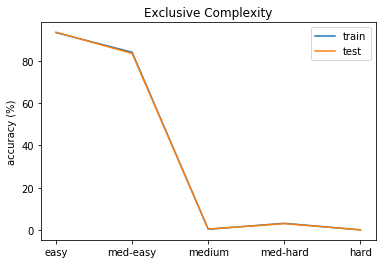

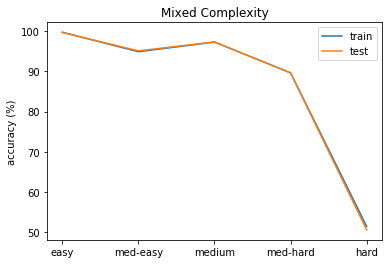

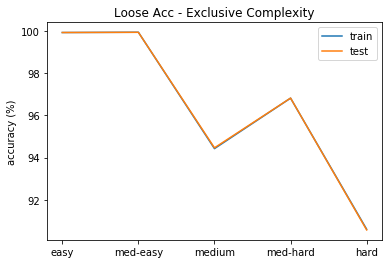

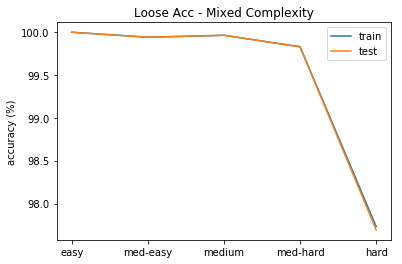

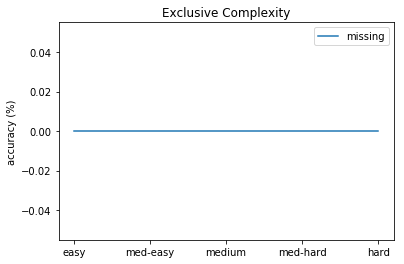

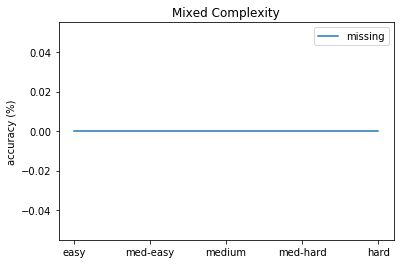

In [53]:
def plot_results_train_test(train, title, fig, name):

    x = np.linspace(1,5, 5)
    xlabels = ['easy','med-easy','medium','med-hard','hard' ]
    ytext ='accuracy (%)'

    plt.figure(fig)
    print(train)
    plt.plot(x, train, label=name)
    plt.title(title)
    plt.ylabel(ytext)
    plt.xticks(x, xlabels)
    leg = plt.legend(loc='upper right', ncol=1,  fancybox=True)

plot_results_train_test(100*max_train[0,:], "Exclusive Complexity", 1, 'train')
plot_results_train_test(100*max_test[0,:], "Exclusive Complexity", 1, 'test')

plot_results_train_test(100*max_train[1,:], "Mixed Complexity", 2, 'train')
plot_results_train_test(100*max_test[1,:], "Mixed Complexity", 2, 'test')

plot_results_train_test(100*max_train_loose[0,:], "Loose Acc - Exclusive Complexity", 3, 'train')
plot_results_train_test(100*max_test_loose[0,:], "Loose Acc - Exclusive Complexity", 3, 'test')

plot_results_train_test(100*max_train_loose[1,:], "Loose Acc - Mixed Complexity", 4, 'train')
plot_results_train_test(100*max_test_loose[1,:], "Loose Acc - Mixed Complexity", 4, 'test')    

plot_results_train_test(missing[0,:], "Exclusive Complexity", 5, 'missing')
plot_results_train_test(missing[1,:], "Mixed Complexity", 6, 'missing')


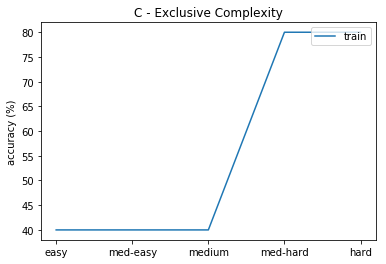

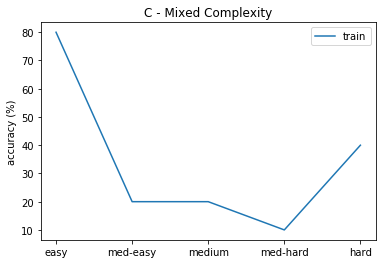

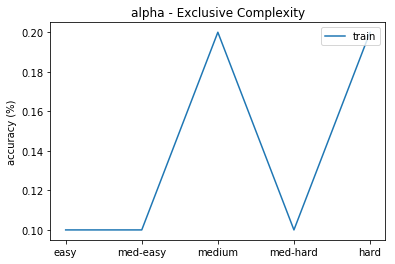

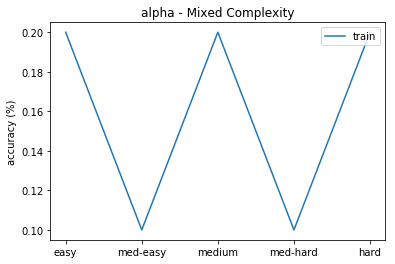

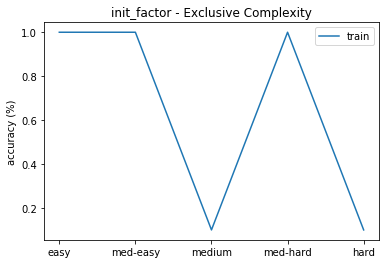

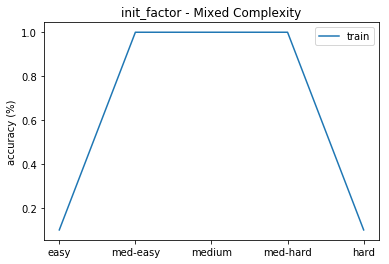

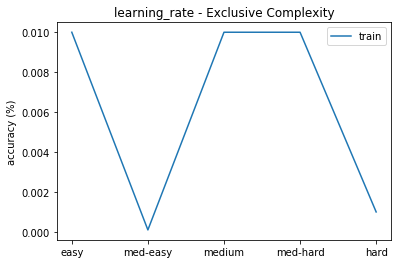

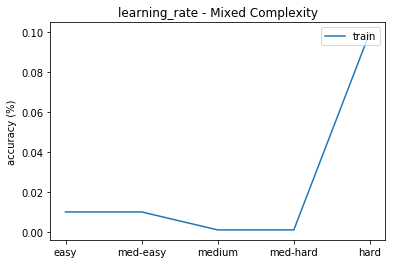

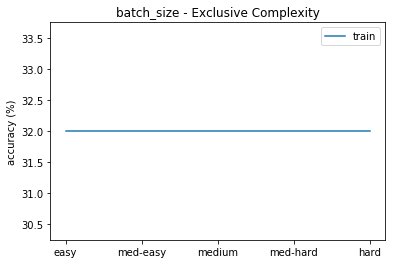

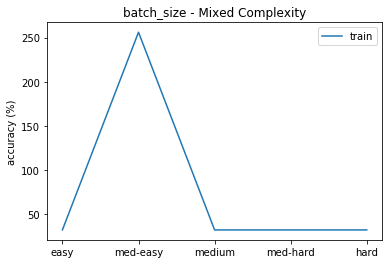

In [43]:
def plot_results(data, title, fig):

    x = np.linspace(1,5, 5)
    xlabels = ['easy','med-easy','medium','med-hard','hard' ]
    ytext ='accuracy (%)'

    plt.figure(fig)
    plt.plot(x, data, label="train")
    plt.title(title)
    plt.ylabel(ytext)
    plt.xticks(x, xlabels)
    leg = plt.legend(loc='upper right', ncol=1,  fancybox=True)

plot_results(C[0,:], "C - Exclusive Complexity", 1)
plot_results(C[1,:], "C - Mixed Complexity", 2)
plot_results(alpha[0,:], "alpha - Exclusive Complexity", 3)
plot_results(alpha[1,:], "alpha - Mixed Complexity", 4)    
plot_results(init_factor[0,:], "init_factor - Exclusive Complexity", 5)
plot_results(init_factor[1,:], "init_factor - Mixed Complexity", 6)   
plot_results(learning_rate[0,:], "learning_rate - Exclusive Complexity", 7)
plot_results(learning_rate[1,:], "learning_rate - Mixed Complexity", 8)  
plot_results(batch_size[0,:], "batch_size - Exclusive Complexity", 9)
plot_results(batch_size[1,:], "batch_size - Mixed Complexity", 10)  

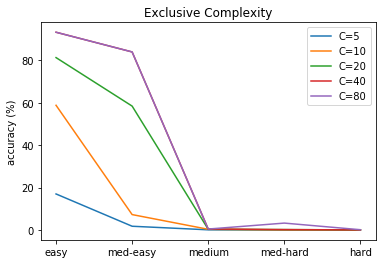

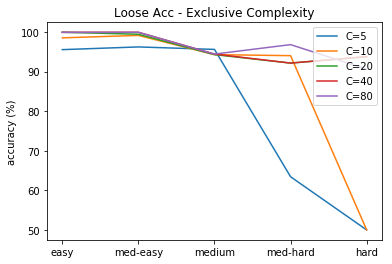

In [44]:
max_val_acc = -np.ones([2, 5])
max_idx = np.zeros([2, 5])
missing = np.zeros([2, 5])

C = [5, 10, 20, 40, 80]
alpha = [0.05, 0.1, 0.2]
init_factor = [1, 1e-1, 1e1]
batch_size = [32, 256, 2048]
learning_rate = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

for c in C:
    for point_idx, data_point in enumerate(results_data):

        point_complextity = data_point["dataset_complexity"]
        idx_strict = 1-int(data_point["dataset_strict_complexity"])

        #if (not ("val" in data_point["results"])):
        #    print(point_idx)

        if (data_point["C"] == c) and not (data_point["results"] == "empty") and ("val" in data_point["results"]): 

                if max_val_acc[idx_strict, point_complextity] < data_point["results"]["val"]:
                    max_idx[idx_strict, point_complextity] = point_idx
                    max_val_acc[idx_strict, point_complextity] = data_point["results"]["val"]

        else:
            missing[idx_strict, point_complextity] += 1

    max_train = np.zeros([2, 5])
    max_test = np.zeros([2, 5])
    max_train_loose = np.zeros([2, 5])
    max_test_loose = np.zeros([2, 5])
    for idx_strict, dataset_strict_complexity  in enumerate([True, False]):
        for dataset_complexity in range(5):
            max_train[idx_strict, dataset_complexity] = \
                results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["train"]
            max_test[idx_strict, dataset_complexity] = \
                results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["test"]
            max_train_loose[idx_strict, dataset_complexity] = \
                results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["trainloose"]
            max_test_loose[idx_strict, dataset_complexity] = \
                results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["testloose"]
            
    plot_results_train_test(100*max_train[0,:], "Exclusive Complexity", 1, "C="+str(c))
    #plot_results_train_test(100*max_train[1,:], "Mixed Complexity", 2, "C="+str(c))
    plot_results_train_test(100*max_train_loose[0,:], "Loose Acc - Exclusive Complexity", 3, "C="+str(c))
    #plot_results_train_test(100*max_train_loose[1,:], "Loose Acc - Mixed Complexity", 4, "C="+str(c))    

In [45]:
data_point

{'C': 80,
 'alpha': 0.2,
 'batch_size': 2048,
 'dataset_complexity': 4,
 'dataset_strict_complexity': True,
 'init_factor': 10.0,
 'learning_rate': 1e-05,
 'results': {'test': 0.0,
  'testloose': 0.5,
  'train': 0.0,
  'trainloose': 0.5,
  'val': 0.0,
  'valloose': 0.5}}

In [46]:
with open(output_path + 'selected_models.pkl', 'rb') as f:
        cross = pickle.load(f)

In [47]:
k=2
print(cross)

{1: {'ID': 777, 'valloose': 0.9999909420011822, 'val': 0.998000168406871, 'testloose': 0.9999772267696552, 'test': 0.9969160491748064, 'trainloose': 0.9999831841625562, 'train': 0.9976317783765578}, 2: {'ID': 1353, 'valloose': 0.9992299217413314, 'val': 0.9350054732233075, 'testloose': 0.9991472793693452, 'test': 0.9348265409228697, 'trainloose': 0.9991413621679225, 'train': 0.9332477265072415}, 3: {'ID': 2007, 'valloose': 0.9993481565547245, 'val': 0.9485887096774194, 'testloose': 0.9994041213104802, 'test': 0.9513503864247311, 'trainloose': 0.999401571128958, 'train': 0.9491557459677419}, 'num_families': 10, 5: {'ID': 3676, 'valloose': 0.9995868187153046, 'val': 0.9733917143819468, 'testloose': 0.9996358310987589, 'test': 0.9734653923880094, 'trainloose': 0.9996228832795429, 'train': 0.9731391040754462}, 6: {'ID': 4665, 'valloose': 0.9437614815048033, 'val': 0.004999578982822499, 'testloose': 0.944611138047173, 'test': 0.005020629841697541, 'trainloose': 0.9442307770995028, 'train': 

In [37]:
cross['num_families']

10